In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_parquet('data/Syn-training.parquet')
df = pd.concat([df, pd.read_parquet('data/DNS-testing.parquet')])
df = pd.concat([df, pd.read_parquet('data/UDP-testing.parquet')])
df['Label'].value_counts()

Label
Syn          43302
Benign       32110
DrDoS_UDP    10420
DrDoS_DNS     3669
Name: count, dtype: int64

In [25]:
# sample
df = df.sample(frac=0.4, random_state=123)

In [26]:
# perform KPCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(df.drop(['Label'], axis=1))


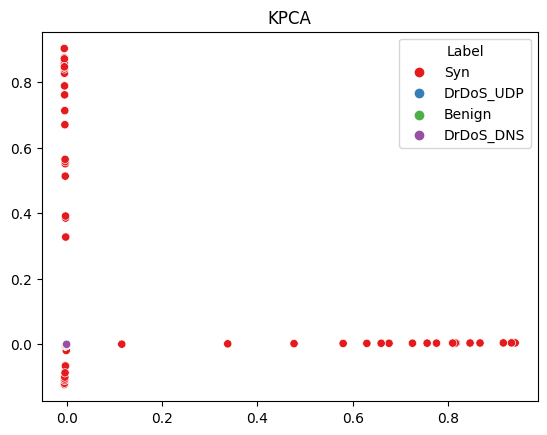

In [27]:
# plot the result sns
import seaborn as sns
sns.scatterplot(x=X_kpca[:,0], y=X_kpca[:,1], hue=df['Label'], palette='Set1')
plt.title('KPCA')
plt.show()
